In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.listdir()

['.config', 'gdrive', '.ipynb_checkpoints', 'sample_data']

In [1]:
!pip install pydub

In [ ]:
train_path = "/content/gdrive/MyDrive/data/musdb18_train/"
test_path = "/content/gdrive/MyDrive/data/musdb18_test/"

import os

train_dir= os.listdir(train_path)
test_dir= os.listdir(test_path)

In [ ]:
mix_path = "/mix.mp3"
vocal_path = "/vocal.mp3"

categories = ["bass","drums","mix","other","vocals"]

for i in test_dir:
    for j in categories:
    mp3_path = test_path+i+"/"+j+".mp3"
    # wav_path = train_path+"/"+i+"/"+j+".wav"
    os.remove(mp3_path)
    # # convert mp3 file to wav file
    # sound = AudioSegment.from_mp3(mp3_path)
    # sound.export(wav_path, format="wav")

171.24721088435373

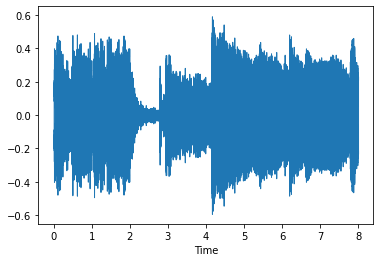

In [ ]:
import librosa
import librosa.display as dsp
# from IPython.display import Audio
filename="/content/gdrive/MyDrive/data/musdb18_train/A Classic Education - NightOwl.stem.mp4/mix.wav"
# plt.figure(figsize=(14,5))
data,sr=librosa.load(filename,offset=16,duration=8)
dsp.waveshow(data,sr=sr)
# plt.show()
# Audio(filename)
data,sr=librosa.load(filename)
librosa.get_duration(data)

In [ ]:
train_path = "/content/gdrive/MyDrive/data/musdb18_train/"
test_path = "/content/gdrive/MyDrive/data/musdb18_test/"

import os

train_dir= os.listdir(train_path)
test_dir= os.listdir(test_path)

In [ ]:
len(train_dir)

100

In [ ]:
mix_path = "/mix.mp3"
vocal_path = "/vocal.mp3"

categories = ["bass","drums","mix","other","vocals"]
categories = ["mix","vocals"]
mix_stft_list = []
vocals_stft_list = []
h = 0
for i in train_dir[:25]:
    h += 1
    for j in categories:
    filename = train_path+i+"/"+j+".wav"
    data,sr = librosa.load(filename)
    dur = librosa.get_duration(data)
    stamps = int(dur//8)
    start = 0
    eight = 8
    print(h, filename)
    for k in range(stamps):
        
        data,sr = librosa.load(filename,offset=start,duration=eight)
        start+=8
        X = librosa.stft(data)
        # X = np.abs(X)
    if j == "mix":
        mix_stft_list.append(X)
    else:
        vocals_stft_list.append(X)
# print(mix_stft_list)
# print(vocals_stft_list)

1 /content/gdrive/MyDrive/data/musdb18_train/A Classic Education - NightOwl.stem.mp4/mix.wav
1 /content/gdrive/MyDrive/data/musdb18_train/A Classic Education - NightOwl.stem.mp4/vocals.wav
2 /content/gdrive/MyDrive/data/musdb18_train/ANiMAL - Clinic A.stem.mp4/mix.wav
2 /content/gdrive/MyDrive/data/musdb18_train/ANiMAL - Clinic A.stem.mp4/vocals.wav
3 /content/gdrive/MyDrive/data/musdb18_train/ANiMAL - Easy Tiger.stem.mp4/mix.wav
3 /content/gdrive/MyDrive/data/musdb18_train/ANiMAL - Easy Tiger.stem.mp4/vocals.wav
4 /content/gdrive/MyDrive/data/musdb18_train/ANiMAL - Rockshow.stem.mp4/mix.wav
4 /content/gdrive/MyDrive/data/musdb18_train/ANiMAL - Rockshow.stem.mp4/vocals.wav
5 /content/gdrive/MyDrive/data/musdb18_train/Actions - Devil's Words.stem.mp4/mix.wav
5 /content/gdrive/MyDrive/data/musdb18_train/Actions - Devil's Words.stem.mp4/vocals.wav
6 /content/gdrive/MyDrive/data/musdb18_train/Actions - One Minute Smile.stem.mp4/mix.wav
6 /content/gdrive/MyDrive/data/musdb18_train/Actions -

In [ ]:
len(mix_stft_list)

750

In [ ]:
mix_numpy = np.array(mix_stft_list)
vocals_numpy = np.array(vocals_stft_list)

In [ ]:
print(mix_numpy.shape)
print(vocals_numpy.shape)

(750, 1025, 345)
(750, 1025, 345)


In [ ]:
with open('mix.npy', 'wb') as f:
    np.save(f, mix_numpy)

In [ ]:
with open('vocals.npy', 'wb') as f:
    np.save(f, vocals_numpy)

In [ ]:
with open('/content/gdrive/MyDrive/data/mix1.npy', 'wb') as f:
    np.save(f, mix_numpy)
with open('/content/gdrive/MyDrive/data/vocals1.npy', 'wb') as f:
    np.save(f, vocals_numpy)